In [1]:
import Access_Keys

In [2]:
import pandas as pd
import numpy as np

In [3]:
import OpenBlender
import json

In [4]:
token = Access_Keys.OpenBlender_api_token
action = 'API_getObservationsFromDataset'
# ANCHOR: 'Bitcoin vs USD'
  
parameters = { 
    'token' : token,
    'id_dataset' : '5d4c3af79516290b01c83f51',
    'date_filter':{"start_date" : "2020-01-01",
                   "end_date" : "2020-08-29"} 
}
df = pd.read_json(json.dumps(OpenBlender.call(action, parameters)['sample']), convert_dates=False, convert_axes=False).sort_values('timestamp', ascending=False)
df.reset_index(drop=True, inplace=True)
df['date'] = [OpenBlender.unixToDate(ts, timezone = 'GMT') for ts in df.timestamp]
df = df.drop('timestamp', axis = 1)

Task ID: '609797c00895fafb4a9d8d4b'.
Total estimated consumption: 500.02 processing units.
Task confirmed. Starting download..
100.0 % completed.


In [5]:
df.head()

,volume,price,high,low,open,change,date
0,2.02K,11545.0,11545.0,11343.0,11343.0,1.78%,28-08-2020 17:00:00
1,4.81K,11343.0,11471.1,11254.0,11471.1,-1.12%,27-08-2020 17:00:00
2,2.48K,11471.0,11482.0,11316.0,11341.0,1.15%,26-08-2020 17:00:00
3,6.16K,11341.0,11768.0,11200.0,11768.0,-3.63%,25-08-2020 17:00:00
4,1.93K,11663.0,11692.6,11551.0,11685.0,-0.19%,23-08-2020 17:00:00


In [6]:
df.tail()

,volume,price,high,low,open,change,date
231,4.45K,7364.6,7509.9,7315.8,7370.3,-0.07%,05-01-2020 17:00:00
232,4.27K,7369.8,7422.0,7297.7,7371.8,0.03%,04-01-2020 17:00:00
233,6.68K,7367.5,7437.6,6909.3,6989.4,5.41%,03-01-2020 17:00:00
234,4.85K,6989.4,7225.2,6963.0,7212.7,-3.10%,02-01-2020 17:00:00
235,2.07K,7212.7,7268.8,7185.4,7208.2,0.06%,01-01-2020 17:00:00


In [10]:
df.shape

(236, 7)

<AxesSubplot:xlabel='date'>

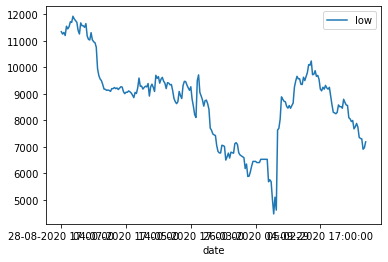

In [8]:
df.plot('date','low')

In [11]:
df['log_diff'] = np.log(df['price']) - np.log(df['open'])
df

,volume,price,high,low,open,change,date,log_diff
0,2.02K,11545.0,11545.0,11343.0,11343.0,1.78%,28-08-2020 17:00:00,0.017652
1,4.81K,11343.0,11471.1,11254.0,11471.1,-1.12%,27-08-2020 17:00:00,-0.011230
2,2.48K,11471.0,11482.0,11316.0,11341.0,1.15%,26-08-2020 17:00:00,0.011398
3,6.16K,11341.0,11768.0,11200.0,11768.0,-3.63%,25-08-2020 17:00:00,-0.036960
4,1.93K,11663.0,11692.6,11551.0,11685.0,-0.19%,23-08-2020 17:00:00,-0.001885
...,...,...,...,...,...,...,...,...
231,4.45K,7364.6,7509.9,7315.8,7370.3,-0.07%,05-01-2020 17:00:00,-0.000774
232,4.27K,7369.8,7422.0,7297.7,7371.8,0.03%,04-01-2020 17:00:00,-0.000271
233,6.68K,7367.5,7437.6,6909.3,6989.4,5.41%,03-01-2020 17:00:00,0.052684
234,4.85K,6989.4,7225.2,6963.0,7212.7,-3.10%,02-01-2020 17:00:00,-0.031449


In [12]:
df['target'] = [1 if log_diff > 0 else 0 for log_diff in df['log_diff']]
df

,volume,price,high,low,open,change,date,log_diff,target
0,2.02K,11545.0,11545.0,11343.0,11343.0,1.78%,28-08-2020 17:00:00,0.017652,1
1,4.81K,11343.0,11471.1,11254.0,11471.1,-1.12%,27-08-2020 17:00:00,-0.011230,0
2,2.48K,11471.0,11482.0,11316.0,11341.0,1.15%,26-08-2020 17:00:00,0.011398,1
3,6.16K,11341.0,11768.0,11200.0,11768.0,-3.63%,25-08-2020 17:00:00,-0.036960,0
4,1.93K,11663.0,11692.6,11551.0,11685.0,-0.19%,23-08-2020 17:00:00,-0.001885,0
...,...,...,...,...,...,...,...,...,...
231,4.45K,7364.6,7509.9,7315.8,7370.3,-0.07%,05-01-2020 17:00:00,-0.000774,0
232,4.27K,7369.8,7422.0,7297.7,7371.8,0.03%,04-01-2020 17:00:00,-0.000271,0
233,6.68K,7367.5,7437.6,6909.3,6989.4,5.41%,03-01-2020 17:00:00,0.052684,1
234,4.85K,6989.4,7225.2,6963.0,7212.7,-3.10%,02-01-2020 17:00:00,-0.031449,0


In [15]:
format = '%d-%m-%Y %H:%M:%S'
timezone = 'GMT'
df['timestamp'] = OpenBlender.dateToUnix(df['date'], 
                                           date_format = format, 
                                           timezone = timezone)
df = df[['date', 'timestamp', 'price', 'target']]
df.head()

,date,timestamp,price,target
0,28-08-2020 17:00:00,1.598634e+09,11545.0,1
1,27-08-2020 17:00:00,1.598548e+09,11343.0,0
2,26-08-2020 17:00:00,1.598461e+09,11471.0,1
3,25-08-2020 17:00:00,1.598375e+09,11341.0,0
4,23-08-2020 17:00:00,1.598202e+09,11663.0,0


In [16]:
blend_source = {
                'id_dataset':'5ea2039095162936337156c9',
                'feature' : 'text'
            }

# Now, let's 'timeBlend' it to our dataset
df_blend = OpenBlender.timeBlend( token = token,
                                  anchor_ts = df.timestamp,
                                  blend_source = blend_source,
                                  blend_type = 'agg_in_intervals',
                                  interval_size = 60 * 60 * 24,
                                  direction = 'time_prior',
                                  interval_output = 'list',
                                  missing_values = 'raw')
df = pd.concat([df, df_blend.loc[:, df_blend.columns != 'timestamp']], axis = 1)
df.head()

Task ID: '609798dc0895fafb4a9d8d4b'.
Total estimated consumption: 500.16 processing units.
Task confirmed. Starting download..
100%


,date,timestamp,price,target,BITCOIN_NE.text_COUNT_last1days,BITCOIN_NE.text_last1days
0,28-08-2020 17:00:00,1.598634e+09,11545.0,1,0,[]
1,27-08-2020 17:00:00,1.598548e+09,11343.0,0,0,[]
2,26-08-2020 17:00:00,1.598461e+09,11471.0,1,0,[]
3,25-08-2020 17:00:00,1.598375e+09,11341.0,0,0,[]
4,23-08-2020 17:00:00,1.598202e+09,11663.0,0,0,[]


In [17]:
df.tail()

,date,timestamp,price,target,BITCOIN_NE.text_COUNT_last1days,BITCOIN_NE.text_last1days
231,05-01-2020 17:00:00,1.578244e+09,7364.6,0,5,[subhash chandra garg on the future of crypto ...
232,04-01-2020 17:00:00,1.578157e+09,7369.8,0,6,[crypto fundraising is changing again in 2020 ...
233,03-01-2020 17:00:00,1.578071e+09,7367.5,1,8,[ticker tool uses the bch blockchain to provid...
234,02-01-2020 17:00:00,1.577984e+09,6989.4,0,7,[government confirms crypto profits not taxabl...
235,01-01-2020 17:00:00,1.577898e+09,7212.7,1,3,[etoro ceo yoni assia on reaching 12 million u...


In [19]:
df.columns

Index(['date', 'timestamp', 'price', 'target',
       'BITCOIN_NE.text_COUNT_last1days', 'BITCOIN_NE.text_last1days'],
      dtype='object')

In [85]:
test = df[df['BITCOIN_NE.text_COUNT_last1days'] != 0]
test.reset_index(drop=True, inplace=True)
test

,date,timestamp,price,target,BITCOIN_NE.text_COUNT_last1days,BITCOIN_NE.text_last1days
0,15-08-2020 17:00:00,1.597511e+09,11873.4,1,1,[market update btc inches toward 12k eth jumps...
1,14-08-2020 17:00:00,1.597424e+09,11761.0,0,8,[coinbase to offer bitcoinbased cash loans of ...
2,13-08-2020 17:00:00,1.597338e+09,11792.5,1,8,[australian woman jailed two years for stealin...
3,12-08-2020 17:00:00,1.597252e+09,11591.0,1,8,[defcon speaker discusses liberating 300k wort...
4,10-08-2020 17:00:00,1.597079e+09,11892.0,1,9,[market outlook btc trend targets 15k bitcoin ...
...,...,...,...,...,...,...
220,05-01-2020 17:00:00,1.578244e+09,7364.6,0,5,[subhash chandra garg on the future of crypto ...
221,04-01-2020 17:00:00,1.578157e+09,7369.8,0,6,[crypto fundraising is changing again in 2020 ...
222,03-01-2020 17:00:00,1.578071e+09,7367.5,1,8,[ticker tool uses the bch blockchain to provid...
223,02-01-2020 17:00:00,1.577984e+09,6989.4,0,7,[government confirms crypto profits not taxabl...


In [55]:
test.shape

(225, 6)

In [44]:
test['BITCOIN_NE.text_last1days'][0][0]

'market update btc inches toward 12k eth jumps 12 report says link may see rough waters '

In [74]:
from textblob import TextBlob

#used to analyze sentiment w/ textblob, leaving the raw output
def analize_sentiment_raw(headline):
    '''
    Function to lassify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(headline)
    #polarity = negative (-1) to positive (1)
    return analysis.sentiment.polarity 

In [ ]:
sentiment = []
for l in test['BITCOIN_NE.text_last1days']:
    daily_sentiment = 0
    for tweet in l:
        x = analize_sentiment_raw(tweet)
        daily_sentiment += x
#         print(tweet)
#         print(x)
    sentiment.append(daily_sentiment)

final = test.assign(sentiment = sentiment)
final

In [89]:
final.drop(['date','timestamp','BITCOIN_NE.text_last1days','BITCOIN_NE.text_COUNT_last1days'],inplace = True,axis=1)
final

,price,target,sentiment
0,11873.4,1,-0.100000
1,11761.0,0,0.579167
2,11792.5,1,0.516667
3,11591.0,1,0.800000
4,11892.0,1,-0.376984
...,...,...,...
220,7364.6,0,-0.113636
221,7369.8,0,0.468182
222,7367.5,1,-0.350000
223,6989.4,0,0.400000


In [91]:
final.to_csv('Dataset.csv',index=False)